<a href="https://colab.research.google.com/github/Foysal440/Predictive-Analytics-for-Psychological-Outcomes-with-Blockchain-Data-Integrity/blob/main/Predictive_Analytics_for_Psychological_Outcomes_with_Blockchain_Data_Integrity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import hashlib

# Simulate psychological assessment data

In [ ]:
np.random.seed(42)
X = np.random.rand(5000, 20)  # Increased to 5000 samples and 20 features
y = np.random.randint(2, size=5000)  # Binary target variable

# Feature Engineering: Standardizing the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# RandomForestClassifier for Predictive Analysis

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Model Evaluation Visualization

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


# Simple Blockchain Simulation for Data Integrity

In [ ]:
class SimpleBlockchain:
    def __init__(self):
        self.chain = []
        self.add_block("Genesis block")

    def add_block(self, data):
        previous_hash = self.chain[-1]["hash"] if self.chain else '0' * 64
        block_data = str(data)
        block_hash = hashlib.sha256(block_data.encode() + previous_hash.encode()).hexdigest()
        block = {"hash": block_hash, "data": data, "previous_hash": previous_hash}
        self.chain.append(block)

blockchain = SimpleBlockchain()
for feature_set in X_train[:5]:  # Add first 5 training feature sets to blockchain
    data_hash = hashlib.sha256(feature_set.tobytes()).hexdigest()
    blockchain.add_block(data_hash)

# Visualization

In [ ]:
plt.figure(figsize=(12, 6))
plt.show()

<Figure size 1200x600 with 0 Axes>

# ROC Curve for Model Performance

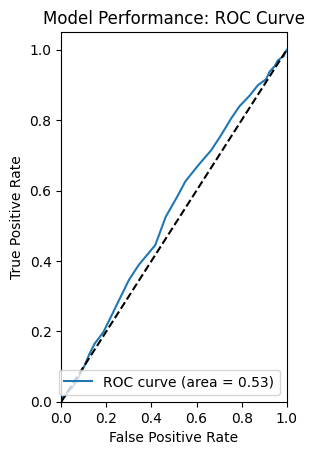

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Performance: ROC Curve')
plt.legend(loc="lower right")

# Blockchain Data Integrity Visualization

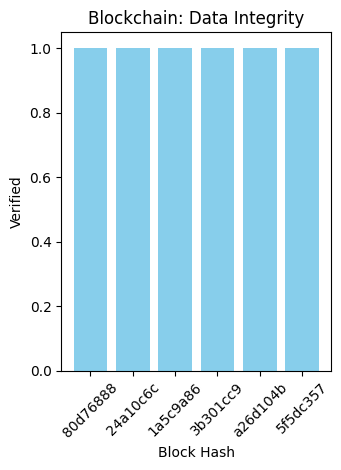

In [ ]:
plt.subplot(1, 2, 2)
block_hashes = [block['hash'][:8] for block in blockchain.chain]  # Show partial hashes
plt.bar(range(len(block_hashes)), [1]*len(block_hashes), tick_label=block_hashes, color='skyblue')
plt.xticks(rotation=45)
plt.title('Blockchain: Data Integrity')
plt.xlabel('Block Hash')
plt.ylabel('Verified')

plt.tight_layout()
plt.show()

# Accuracy

In [ ]:
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.53


# Evaluating the best model from grid search

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluating the best model from grid search
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Best Model Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.53
ROC AUC: 0.53
